# This notebook gets the results from the DB to process into histograms and others

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def connection(user,passwd,dbname, echo_i=False):
    str1 = ('postgresql+pg8000://' + user +':' + passw + '@switch-db2.erg.berkeley.edu:5433/' 
            + dbname + '?ssl=true&sslfactory=org.postgresql.ssl.NonValidatingFactory')
    engine = create_engine(str1,echo=echo_i)
    return engine

In [4]:
user = 'jdlara'
passw = 'Amadeus-2010'
dbname = 'apl_cec' 
engine= connection(user,passw,dbname)

In [17]:
for year in ['2012', '2013', '2014', '2015']:
    query_hist = ('with d_bm_stats as ('+
                'select min("D_BM_kg")/1000 as min, ' +
                       'max("D_BM_kg")/1000 as max ' +
                  'from lemmav2.lemma_1215 where "D_BM_kg" > 100 and "RPT_YR" = ' + year + ') ' +
                'select width_bucket(("D_BM_kg")/1000, min, max, 40) as bucket, ' +
                        'int4range(min(("D_BM_kg")/1000)::INT, max(("D_BM_kg")/1000)::INT, \'[]\') as range, ' +
                        'count(*) as freq ' +
                    'from lemmav2.lemma_1215, d_bm_stats where "D_BM_kg" > 100 and "RPT_YR" = ' + year +
                ' group by bucket ' +
                'order by bucket;')

with d_bm_stats as (select min("D_BM_kg")/1000 as min, max("D_BM_kg")/1000 as max from lemmav2.lemma_1215 where "D_BM_kg" > 100 and "RPT_YR" = 2012) select width_bucket(("D_BM_kg")/1000, min, max, 40) as bucket, int4range(min(("D_BM_kg")/1000)::INT, max(("D_BM_kg")/1000)::INT, '[]') as range, count(*) as freq from lemmav2.lemma_1215, d_bm_stats where "D_BM_kg" > 100 and "RPT_YR" = 2012 group by bucket order by bucket;
with d_bm_stats as (select min("D_BM_kg")/1000 as min, max("D_BM_kg")/1000 as max from lemmav2.lemma_1215 where "D_BM_kg" > 100 and "RPT_YR" = 2013) select width_bucket(("D_BM_kg")/1000, min, max, 40) as bucket, int4range(min(("D_BM_kg")/1000)::INT, max(("D_BM_kg")/1000)::INT, '[]') as range, count(*) as freq from lemmav2.lemma_1215, d_bm_stats where "D_BM_kg" > 100 and "RPT_YR" = 2013 group by bucket order by bucket;
with d_bm_stats as (select min("D_BM_kg")/1000 as min, max("D_BM_kg")/1000 as max from lemmav2.lemma_1215 where "D_BM_kg" > 100 and "RPT_YR" = 2014) select 

In [15]:
def lemma_stats(engine):

    for year in ['2012', '2013', '2014', '2015']:
        query_hist = ('with d_bm_stats as ('+
                    'select min("D_BM_kg")/1000 as min, ' +
                           'max("D_BM_kg")/1000 as max ' +
                      'from lemmav2.lemma_1215 where "D_BM_kg" > 100 and "RPT_YR" = ' + year + ') ' +
                    'select width_bucket(("D_BM_kg")/1000, min, max, 40) as bucket, ' +
                            'int4range(min(("D_BM_kg")/1000)::INT, max(("D_BM_kg")/1000)::INT, \'[]\') as range, ' +
                            'count(*) as freq ' +
                        'from lemmav2.lemma_1215, d_bm_stats where "D_BM_kg" > 100 and "RPT_YR" = ' + year +
                    ' group by bucket ' +
                    'order by bucket;')
        query_sum = ('')
    

In [6]:
result = pd.read_sql_query(query,engine)

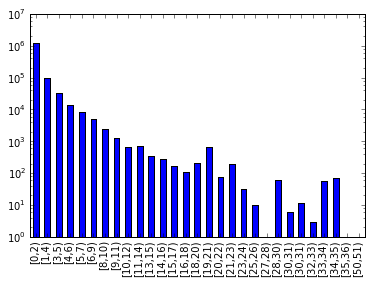

In [18]:
plot_2012 = result.freq.plot(kind='bar', logy = True)
plot_2012.set_xticklabels(result.range);

In [25]:
query = ('with d_bm_stats as ('+
            'select min("D_BM_kg")/1000 as min, ' +
                   'max("D_BM_kg")/1000 as max ' +
              'from lemmav2.lemma_1215 where "D_BM_kg" > 100 and "RPT_YR" = 2013) ' +
            'select width_bucket(("D_BM_kg")/1000, min, max, 40) as bucket, ' +
                    'int4range(min(("D_BM_kg")/1000)::INT, max(("D_BM_kg")/1000)::INT, \'[]\') as range, ' +
                    'count(*) as freq ' +
                'from lemmav2.lemma_1215, d_bm_stats where "D_BM_kg" > 100 and "RPT_YR" = 2013 ' +
            'group by bucket ' +
            'order by bucket;')